In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.scale as mscale
import matplotlib.figure as Figure
import matplotlib.dates as mdates
import datetime as datetime
%matplotlib inline

In [2]:
ridership = pd.read_csv("Fare_Card_History_for_Metropolitan_Transportation_Authority__MTA___Beginning_2010.csv")

In [3]:
ridership["From Date"]=pd.to_datetime(ridership["From Date"])
ridership["To Date"]=pd.to_datetime(ridership["To Date"])
ridership.head()

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,...,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
0,2021-08-06,2021-07-31,R001,WHITEHALL STREET,27946,1824,242,376,8,11958,...,539,162,0,717,0,0,0,327,0,0
1,2021-08-06,2021-07-31,R003,CYPRESS HILLS,1323,134,3,13,0,817,...,12,19,0,11,0,0,0,70,0,0
2,2021-08-06,2021-07-31,R004,75TH STREET & ELDERTS LANE,4241,321,15,43,0,2029,...,14,31,0,28,0,0,0,301,0,0
3,2021-08-06,2021-07-31,R005,85TH STREET & FOREST PKWAY,4418,389,29,30,1,1999,...,13,25,0,40,0,0,0,111,0,0
4,2021-08-06,2021-07-31,R006,WOODHAVEN BOULEVARD,4193,315,27,55,0,2946,...,36,14,0,25,0,0,0,148,0,0


In [1]:
SFR = ridership.filter(['From Date','To Date','Senior Citizen / Disabled','Full Fare'], axis=1)

#change from and to date into datetime objects
SFR["From Date"]=pd.to_datetime(SFR["From Date"])
SFR["To Date"]=pd.to_datetime(SFR["To Date"])

#sum over all the stations
SFR1=pd.DataFrame()
SFR1['Senior/Disabled']=SFR.groupby(by=["From Date"])['Senior Citizen / Disabled'].sum()
SFR1["Full Fare"]=SFR.groupby(by=["From Date"])['Full Fare'].sum()
SFR1['To Date']=SFR.groupby(by=["From Date"])["To Date"].unique()

#reorder columns
SFR1=SFR1.reset_index()
SFR1=SFR1[["From Date","To Date","Senior/Disabled","Full Fare"]]

#cut out rows 529,8,7,6 since they are out of sequence and also backwards
SFR1=SFR1.drop([529,528,527,526])

#add a year column
SFR1["Year"]=pd.DatetimeIndex(SFR1['From Date']).year


NameError: name 'ridership' is not defined

In [5]:
#when was the biggest spike - and why?

max_fares = SFR1.loc[SFR1["Full Fare"].idxmax()]
print("Maximum weekly sum of fares ", ":\n", max_fares)
busiestweek=ridership.loc[ridership["From Date"] == "2015-05-16 00:00:00"]
busiest_station = busiestweek.loc[busiestweek["Full Fare"].idxmax()]
print("busiest station on the busiest week:", busiest_station["Station"])

#when was the biggest dip? -> of course its COVID
min_fares=SFR1.loc[SFR1["Full Fare"].idxmin()]
print("Minimum weekly sum of fares ", ":\n", min_fares)
lowestweek=SFR1.loc[SFR1["Full Fare"] == min_fares["Full Fare"]]

#isolate just the year 2012 : hurricane sandy
year2012=pd.to_datetime(2012,format='%Y')
twenty12=SFR1[SFR1["Year"]==2012]
twenty12_min_fares=twenty12.loc[twenty12["Full Fare"].idxmin()]
print(twenty12_min_fares)

Maximum weekly sum of fares  :
 From Date                      2015-05-16 00:00:00
To Date            [2015-05-22T00:00:00.000000000]
Senior/Disabled                             814465
Full Fare                                 20346653
Year                                          2015
Name: 251, dtype: object
busiest station on the busiest week: 14TH STREET-UNION SQUARE
Minimum weekly sum of fares  :
 From Date                      2020-04-11 00:00:00
To Date            [2020-04-17T00:00:00.000000000]
Senior/Disabled                              82384
Full Fare                                  1164815
Year                                          2020
Name: 493, dtype: object
From Date                      2012-10-27 00:00:00
To Date            [2012-11-02T00:00:00.000000000]
Senior/Disabled                             106099
Full Fare                                  2341384
Year                                          2012
Name: 125, dtype: object


In [6]:
date_form=mdates.DateFormatter("%b %Y")

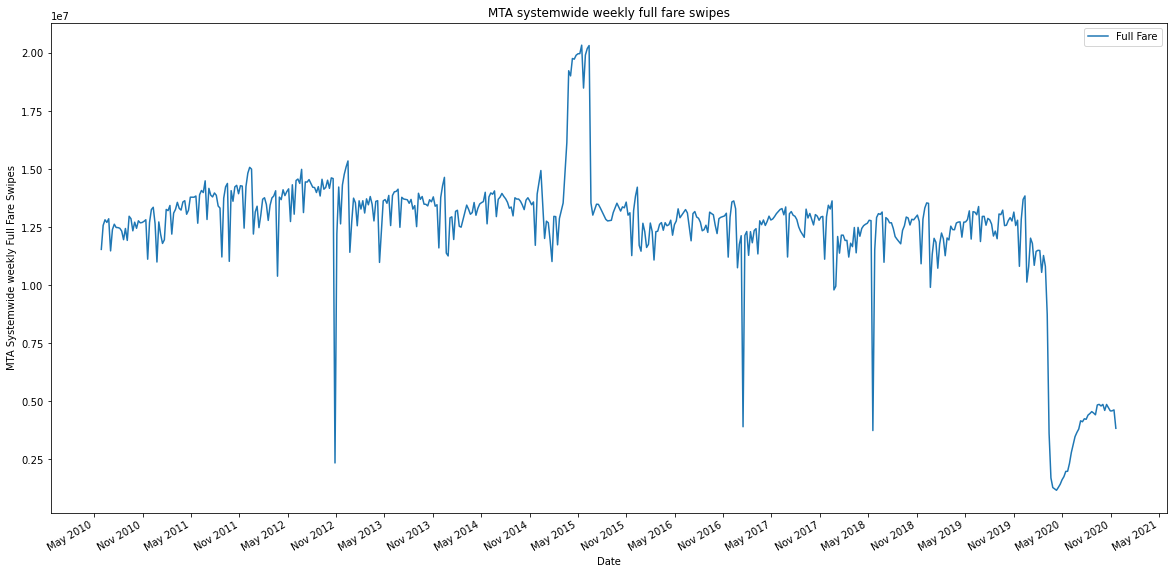

In [7]:
fig3 = SFR1.plot("From Date","Full Fare",figsize=(20,10),ylabel='MTA Systemwide weekly Full Fare Swipes',title="MTA systemwide weekly full fare swipes",
        xlabel="Date", logy=False)
fig3.xaxis.set_major_formatter(date_form)
fig3.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.savefig('figure3.jpeg')

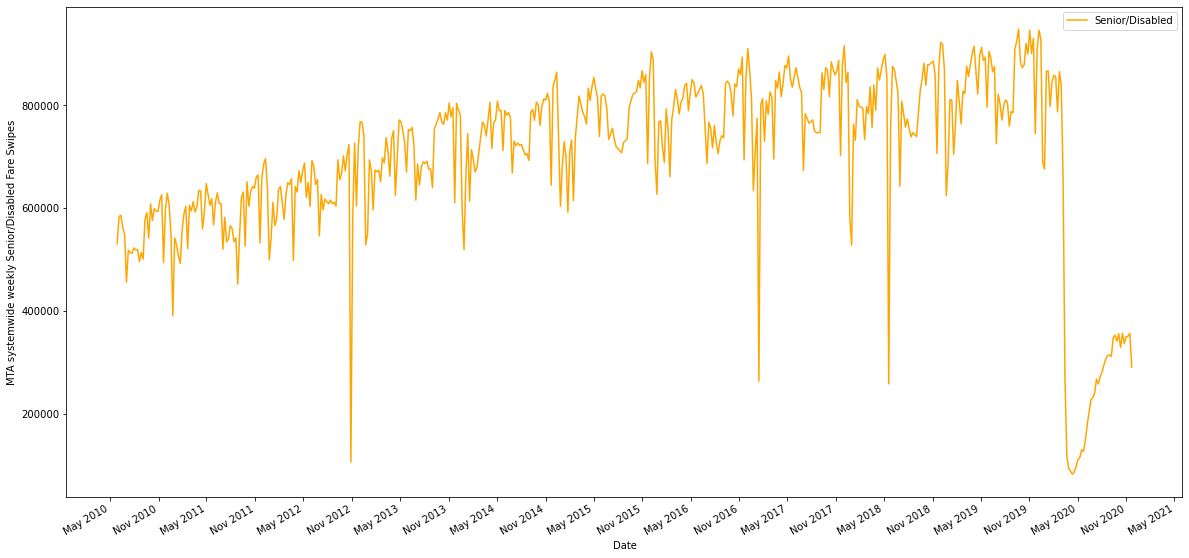

In [12]:
fig2 = SFR1.plot("From Date","Senior/Disabled",figsize=(20,10),ylabel="MTA systemwide weekly Senior/Disabled Fare Swipes",xlabel="Date",logy=False,color="orange")
fig2.xaxis.set_major_formatter(date_form)
fig2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.savefig("figure2.jpeg")

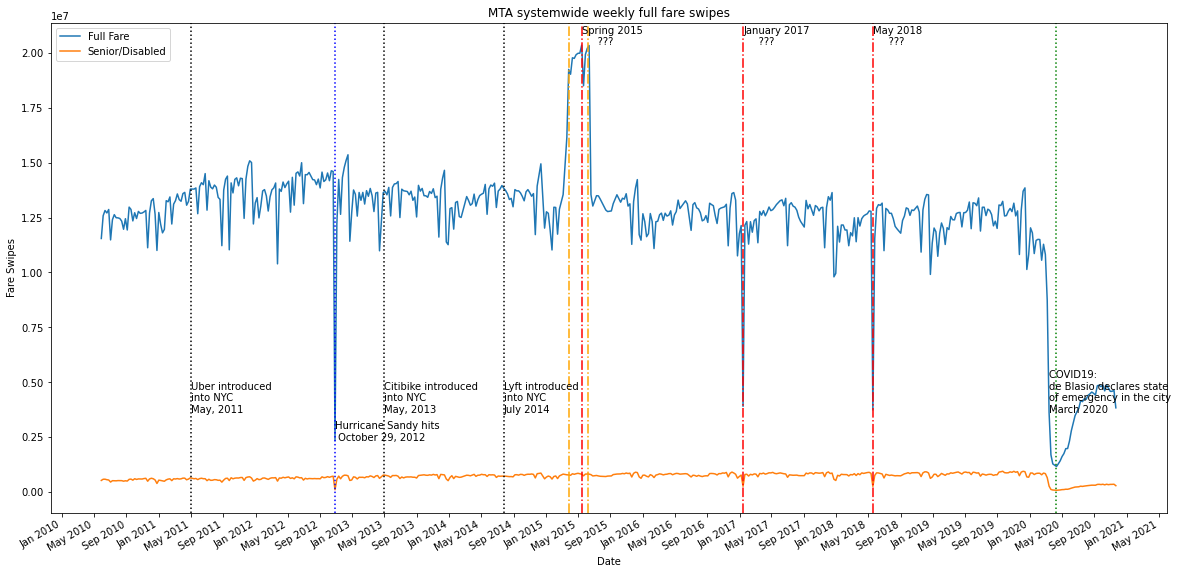

In [9]:
fig1 = SFR1.plot(x="From Date",y=["Full Fare","Senior/Disabled"],figsize=(20,10),ylabel='Fare Swipes',title="MTA systemwide weekly full fare swipes",
        xlabel="Date", logy=False)

fig1.xaxis.set_major_formatter(date_form)
fig1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


#label significant events
springDI=SFR1.index[SFR1["From Date"]=="2015-05-16"]
springdate=SFR1["From Date"].at[springDI[0]]
springvalue=SFR1.loc[springDI[0],["Full Fare"]]
date1=(springdate,springvalue)
fig1.annotate("Spring 2015\n     ???",(date1[0],date1[1]),xytext=(date1[0],date1[1]))

fig1.axvline("2012-10-27",ymin=0,ymax=1, color="blue", linestyle="dotted") #minimum pre-covid
fallDI=SFR1.index[SFR1["From Date"]=="2012-10-27"]
falldate=SFR1["From Date"].at[fallDI[0]]
fallvalue=SFR1.loc[fallDI[0],["Full Fare"]]
date2=(falldate,fallvalue)
fig1.annotate("Hurricane Sandy hits\n October 29, 2012",(date2[0],date2[1]),xytext=(date2[0],date2[1]))


fig1.axvline("2015-05-16", color="red", linestyle="dashdot") #maximum
fig1.axvline("2015-03-28", color="orange", linestyle="dashdot")
fig1.axvline("2015-06-09", color="orange", linestyle="dashdot")


fig1.axvline("2017-01-14", color="red", ymin=0,ymax=1,linestyle="dashdot")
fig1.annotate("January 2017\n     ???",("2017-01-14",date1[1]),xytext=("2017-01-14",date1[1]))

fig1.axvline("2018-05-20", color="red", ymin=0,ymax=1,linestyle="dashdot")
fig1.annotate("May 2018\n     ???",("2018-05-20",date1[1]),xytext=("2018-05-20",date1[1]))

fig1.axvline(lowestweek["From Date"], color="green", linestyle="dotted")
CEDI=SFR1.index[SFR1["From Date"]=="2020-03-14"]
CEdate=SFR1["From Date"].at[CEDI[0]]
CEvalue=SFR1.loc[CEDI[0],["Full Fare"]]
date3=(CEdate,CEvalue)
fig1.annotate("COVID19: \nde Blasio declares state\nof emergency in the city\nMarch 2020",(date3[0],date3[1]),xytext=(date3[0],date3[1]))

#some transit dates

#May 2011 Uber introduced into the city
fig1.axvline("2011-05-01",color='black',linestyle="dotted")
fig1.annotate("Uber introduced\ninto NYC\nMay, 2011",("2011-05-01",date3[1]),xytext=("2011-05-01",date3[1]))

#May 2013 citibike launches
fig1.axvline("2013-05-01",color='black',linestyle="dotted")
fig1.annotate("Citibike introduced\ninto NYC\nMay, 2013",("2013-05-01",date3[1]),xytext=("2013-05-01",date3[1]))

#july 25 2014 lyft introduced into all of NYC
fig1.axvline("2014-07-25",color='black',linestyle="dotted")
fig1.annotate("Lyft introduced\ninto NYC\nJuly 2014",("2014-07-25",date3[1]),xytext=("2014-07-25",date3[1]))

plt.savefig('figure1.jpeg')

In [10]:
recent_ridership = pd.read_csv("MTA_Daily_Ridership_Data__Beginning_2020.csv")
RRS=recent_ridership.filter(['Date','Subways: Total Estimated Ridership'],axis=1)
RRS=RRS.rename({'Subways: Total Estimated Ridership' : 'est_s_rides'}, axis=1)
RRS["Date"]=RRS["Date"].astype(str)

#break up the date category into year, month, day; and then turn these into integer values
RRS.insert(2,"Year",RRS["Date"].str[-4:])
RRS.insert(3,"Month",RRS["Date"].str[:2])
RRS.insert(4,"Day",RRS["Date"].str[3:5])
RRS.insert(5,"Log_Rides",np.log(RRS["est_s_rides"]))
RRS["Year"]=RRS["Year"].astype(int)
RRS["Month"]=RRS["Month"].astype(int)
RRS["Day"]=RRS["Day"].astype(int)

RRS["Date"]=pd.to_datetime(RRS["Date"])

rdates = RRS.apply(lambda x: "%04d%02d%02d" % (x["Year"], x["Month"], x["Day"]), axis=1) #create an array of all the dates
RRS.tail()

,Date,est_s_rides,Year,Month,Day,Log_Rides
783,2020-03-05,5513656,2020,3,5,15.522738
784,2020-03-04,5515945,2020,3,4,15.523154
785,2020-03-03,5498556,2020,3,3,15.519996
786,2020-03-02,5347055,2020,3,2,15.492057
787,2020-03-01,2214601,2020,3,1,14.610583


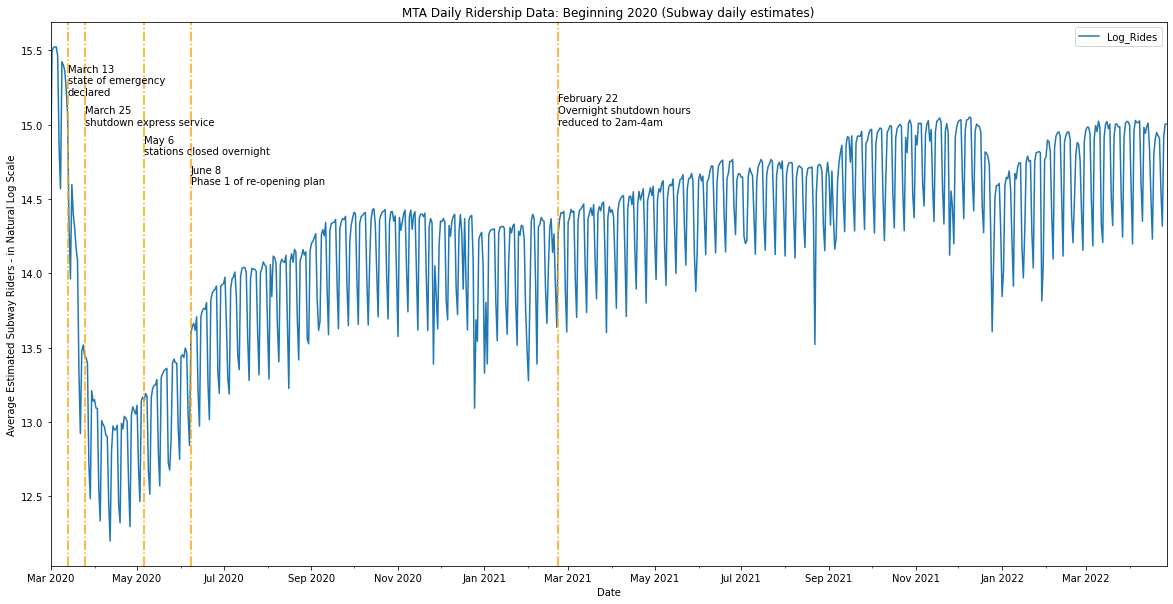

In [11]:
figCOV = RRS.plot("Date","Log_Rides",figsize=(20,10),ylabel='Average Estimated Subway Riders - in Natural Log Scale',title="MTA Daily Ridership Data: Beginning 2020 (Subway daily estimates)",
        logy=False)
date_form = mdates.DateFormatter("%b %Y")
figCOV.xaxis.set_major_formatter(date_form)
figCOV.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

#May 6 2020 stations closed overnight
figCOV.axvline("2020-05-06",color='orange',linestyle="dashdot")
figCOV.annotate("May 6\nstations closed overnight",("2020-05-06",15),xytext=("2020-05-06",14.8))

#march 25 2020 suspend express service; shutdown city
figCOV.axvline("2020-03-25",color='orange',linestyle="dashdot")
figCOV.annotate("March 25\nshutdown express service",("2020-03-25",15),xytext=("2020-03-25",15))

figCOV.axvline("2020-03-13",color='orange',linestyle="dashdot")
figCOV.annotate("March 13\nstate of emergency\ndeclared",("2020-03-13",15),xytext=("2020-03-13",15.2))

#june 8 20: phase 1 reopening plan
figCOV.axvline("2020-06-08",color='orange',linestyle="dashdot")
figCOV.annotate("June 8\nPhase 1 of re-opening plan",("2020-06-08",15),xytext=("2020-06-08",14.6))

#feb 22 2021 overnight shutdown changed to 2-4am\
figCOV.axvline("2021-02-22",color='orange',linestyle="dashdot")
figCOV.annotate("February 22\nOvernight shutdown hours\nreduced to 2am-4am",("2021-02-22",15),xytext=("2021-02-22",15))

plt.savefig("figureCOV.jpeg")